In [54]:
import tensorflow_datasets as tfds
import pandas as pd

radon, info = tfds.load('radon', with_info=True, split='train')

df_org= tfds.as_dataframe(radon,info)

df_org.rename(columns=lambda x: x.replace('features/',""), inplace=True)

# 1. Data Collection

In [55]:
pd.set_option('display.max_columns', None)
df_org.head()

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,state,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
0,1.6,2.49759,292.219543,b'N',3,b'ALLEN ',0,1,1681,41.091000,-85.067001,12.7,2,3,2,11489,2230,b'IN',b'IN',18,11689,2235,2,1,92,b' ',46835,0
1,0.5,2.66527,364.958313,b'N',25,b'YAVAPAI ',0,1,1457,34.599998,-112.554001,0.0,2,5,2,22688,833,b'AZ',b'AZ',4,22888,1010,2,1,56,b' ',86325,0
2,3.0,2.43343,626.564575,b'Y',17,b'MIDDLESEX ',0,0,4224,42.485001,-71.391998,9.7,6,1,2,32288,1000,b'MA',b'MA',25,32488,1000,1,1,23,b' ',1778,0
3,0.6,2.43343,570.611755,b'N',17,b'MIDDLESEX ',0,1,4094,42.485001,-71.391998,27.6,6,3,3,32488,700,b'MA',b'MA',25,32688,1200,1,1,62,b' ',1432,0
4,1.2,2.10811,426.798859,b'Y',95,b'JACKSON ',0,0,6849,39.007999,-94.347000,23.5,1,3,4,32288,605,b'MO',b'MO',29,32488,610,2,1,91,b' ',64134,0


In [56]:
import numpy as np
for col, dtype in df_org.dtypes.items():
    if dtype == np.object:  # Only process byte object columns.
        df_org[col] = df_org[col].apply(lambda x: x.decode("utf-8"))
df_org.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6052\3681078359.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dtype == np.object:  # Only process byte object columns.


,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,idnum,lat,lon,pcterr,region,rep,room,startdt,starttm,state,state2,stfips,stopdt,stoptm,stratum,typebldg,wave,windoor,zip,zipflag
0,1.6,2.49759,292.219543,N,3,ALLEN,0,1,1681,41.091000,-85.067001,12.7,2,3,2,11489,2230,IN,IN,18,11689,2235,2,1,92,,46835,0
1,0.5,2.66527,364.958313,N,25,YAVAPAI,0,1,1457,34.599998,-112.554001,0.0,2,5,2,22688,833,AZ,AZ,4,22888,1010,2,1,56,,86325,0
2,3.0,2.43343,626.564575,Y,17,MIDDLESEX,0,0,4224,42.485001,-71.391998,9.7,6,1,2,32288,1000,MA,MA,25,32488,1000,1,1,23,,1778,0
3,0.6,2.43343,570.611755,N,17,MIDDLESEX,0,1,4094,42.485001,-71.391998,27.6,6,3,3,32488,700,MA,MA,25,32688,1200,1,1,62,,1432,0
4,1.2,2.10811,426.798859,Y,95,JACKSON,0,0,6849,39.007999,-94.347000,23.5,1,3,4,32288,605,MO,MO,29,32488,610,2,1,91,,64134,0


In [57]:
df = df_org.copy()

 # 2. Data Exploration

In [58]:
df.info()

#ไม่มี missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12573 entries, 0 to 12572
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  12573 non-null  float32
 1   Uppm      12573 non-null  float32
 2   adjwt     12573 non-null  float32
 3   basement  12573 non-null  object 
 4   cntyfips  12573 non-null  int32  
 5   county    12573 non-null  object 
 6   dupflag   12573 non-null  int32  
 7   floor     12573 non-null  int32  
 8   idnum     12573 non-null  int32  
 9   lat       12573 non-null  float32
 10  lon       12573 non-null  float32
 11  pcterr    12573 non-null  float32
 12  region    12573 non-null  int32  
 13  rep       12573 non-null  int32  
 14  room      12573 non-null  int32  
 15  startdt   12573 non-null  int32  
 16  starttm   12573 non-null  int32  
 17  state     12573 non-null  object 
 18  state2    12573 non-null  object 
 19  stfips    12573 non-null  int32  
 20  stopdt    12573 non-null  in

In [59]:
# drop idnum ที่ซ้ำทิ้ง
df = df.drop_duplicates(subset="idnum")

#drop columns ที่ไม่ได้ใช้
df= df.drop(['idnum','stfips','windoor','startdt','starttm','stopdt','stoptm','zip'],axis=1)

# 3. Data Preparation

In [60]:
# เปลี่ยน Type ของข้อมูล
cat_cols = [col for col in df.columns if col not in ['activity','Uppm','adjwt','lat','lon','pcterr','wave']]

for col in cat_cols:
    df[col] = df[col].astype('category')
    

df['wave'] = df['wave'].astype('float')

In [61]:
df.info()

#target -->activty(ระดับเรดอนที่วัดได้ในบ้านของสหรัฐฯ)
#feature 19 ตัว 
#n = 12573

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12573 entries, 0 to 12572
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   activity  12573 non-null  float32 
 1   Uppm      12573 non-null  float32 
 2   adjwt     12573 non-null  float32 
 3   basement  12573 non-null  category
 4   cntyfips  12573 non-null  category
 5   county    12573 non-null  category
 6   dupflag   12573 non-null  category
 7   floor     12573 non-null  category
 8   lat       12573 non-null  float32 
 9   lon       12573 non-null  float32 
 10  pcterr    12573 non-null  float32 
 11  region    12573 non-null  category
 12  rep       12573 non-null  category
 13  room      12573 non-null  category
 14  state     12573 non-null  category
 15  state2    12573 non-null  category
 16  stratum   12573 non-null  category
 17  typebldg  12573 non-null  category
 18  wave      12573 non-null  float64 
 19  zipflag   12573 non-null  category
dtypes: cat

In [62]:
# พิจารณาคอลัมน์ county

df.county.value_counts()

# ตรวจสอบ value counts ของ county พบว่าค่อนข้างมาก หากทำเป็น one hot จึงไปดูความสัมพันธ์กับ y ต่อ เพื่อพิจารณาตัดออก

MARICOPA                765
MIDDLESEX               391
JACKSON                 283
PIMA                    260
ALLEGHENY               257
                       ... 
SCHUYLER                  1
LEWIS                     1
MURRAY                    1
DADE                      1
PEMISCOT                  1
Name: county, Length: 386, dtype: int64

In [63]:
df1=df[['activity','county']]
df1.sort_values(by='activity',ascending=False).head(20)

# ตัดคอลัมน์ county ทิ้งไม่ได้เนื่องจาก พบว่ามีความสัมพันธืกับ y
# เช่น จะพบว่าเขต DAUPHIN, YORK, POTTER ... จะมี y ที่ค่อนข้างสูง

,activity,county
7730,273.500000,DAUPHIN
6281,260.899994,ELK
5284,240.399994,UNION
9134,227.199997,POTTER
1315,198.899994,PLYMOUTH
3168,196.699997,LEBANON
6833,184.199997,STARK
9092,168.100006,DAUPHIN
6283,165.600006,POTTER
4845,156.300003,CUMBERLAND


In [64]:
max = df['activity'].max()
min = df['activity'].min()
 
print("Maximum value in column 'activity': ", max)
print("Minimum value in column 'activity': ", min)


# y มีค่าต่ำสุดที่ 0 ดังนั้นจะใช้ activation fn ที่ output เป็น relu

Maximum value in column 'activity':  273.5
Minimum value in column 'activity':  0.0


In [65]:
# พิจารณาคอลัมน์ basement

df.basement.value_counts()

# จากการคาดเดาคิว่า 0 คือ N และส่วนที่เป็นช่องว่างคือ Y 
# ดังนั้นจะทำการแทนที่ 0 ด้วย N และแทนที่ช่องว่างด้วย Y

Y    8469
N    3354
      676
0      74
Name: basement, dtype: int64

In [66]:
# Defining the map function

df['basement']=df['basement'].map({"Y":"Y","":"Y","N":"N","0":"N"})
df.head()

,activity,Uppm,adjwt,basement,cntyfips,county,dupflag,floor,lat,lon,pcterr,region,rep,room,state,state2,stratum,typebldg,wave,zipflag
0,1.6,2.49759,292.219543,N,3,ALLEN,0,1,41.091000,-85.067001,12.7,2,3,2,IN,IN,2,1,92.0,0
1,0.5,2.66527,364.958313,N,25,YAVAPAI,0,1,34.599998,-112.554001,0.0,2,5,2,AZ,AZ,2,1,56.0,0
2,3.0,2.43343,626.564575,Y,17,MIDDLESEX,0,0,42.485001,-71.391998,9.7,6,1,2,MA,MA,1,1,23.0,0
3,0.6,2.43343,570.611755,N,17,MIDDLESEX,0,1,42.485001,-71.391998,27.6,6,3,3,MA,MA,1,1,62.0,0
4,1.2,2.10811,426.798859,Y,95,JACKSON,0,0,39.007999,-94.347000,23.5,1,3,4,MO,MO,2,1,91.0,0


In [67]:
df.basement.value_counts()

Y    8469
N    3428
Name: basement, dtype: int64

In [68]:
df.basement.isnull().sum()

#ส่วนที่เป้นช่องว่างกลายเป็น nan ดังนั้นจะแทนที่ nan ด้วย Y

676

In [69]:
df['basement'] = df['basement'].replace(np.nan, "Y")
df.basement.value_counts()

Y    9145
N    3428
Name: basement, dtype: int64

# create dummy

In [70]:
#create dummy

df['basement'] = df['basement'].astype('category')

categorical_var = list(df.dtypes.loc[df.dtypes == 'category'].index)
print(len(categorical_var))
print(categorical_var)

13
['basement', 'cntyfips', 'county', 'dupflag', 'floor', 'region', 'rep', 'room', 'state', 'state2', 'stratum', 'typebldg', 'zipflag']


In [71]:
cat_vars=['cntyfips', 'county', 'dupflag', 'floor', 'region', 'rep', 'room', 'state', 'state2', 'stratum', 'typebldg', 'zipflag']
df_dummies = pd.get_dummies(df[cat_vars])

In [72]:
df_dummies

,cntyfips_1,cntyfips_3,cntyfips_5,cntyfips_7,cntyfips_9,cntyfips_11,cntyfips_12,cntyfips_13,cntyfips_15,cntyfips_17,cntyfips_19,cntyfips_21,cntyfips_23,cntyfips_25,cntyfips_27,cntyfips_29,cntyfips_31,cntyfips_33,cntyfips_35,cntyfips_37,cntyfips_39,cntyfips_41,cntyfips_43,cntyfips_45,cntyfips_47,cntyfips_49,cntyfips_51,cntyfips_53,cntyfips_55,cntyfips_57,cntyfips_59,cntyfips_61,cntyfips_63,cntyfips_65,cntyfips_67,cntyfips_69,cntyfips_71,cntyfips_73,cntyfips_75,cntyfips_77,cntyfips_79,cntyfips_81,cntyfips_83,cntyfips_85,cntyfips_87,cntyfips_89,cntyfips_91,cntyfips_93,cntyfips_95,cntyfips_97,cntyfips_99,cntyfips_101,cntyfips_103,cntyfips_105,cntyfips_107,cntyfips_109,cntyfips_111,cntyfips_113,cntyfips_115,cntyfips_117,cntyfips_119,cntyfips_121,cntyfips_123,cntyfips_125,cntyfips_127,cntyfips_129,cntyfips_131,cntyfips_133,cntyfips_135,cntyfips_137,cntyfips_139,cntyfips_141,cntyfips_143,cntyfips_145,cntyfips_147,cntyfips_149,cntyfips_151,cntyfips_153,cntyfips_155,cntyfips_157,cntyfips_159,cntyfips_161,cntyfips_163,cntyfips_165,cntyfips_167,cntyfips_169,cntyfips_171,cntyfips_173,cntyfips_175,cntyfips_177,cntyfips_179,cntyfips_181,cntyfips_183,cntyfips_185,cntyfips_186,cntyfips_187,cntyfips_189,cntyfips_195,cntyfips_197,cntyfips_199,cntyfips_201,cntyfips_203,cntyfips_205,cntyfips_207,cntyfips_209,cntyfips_211,cntyfips_213,cntyfips_215,cntyfips_217,cntyfips_219,cntyfips_221,cntyfips_223,cntyfips_225,cntyfips_227,cntyfips_229,cntyfips_510,county_,county_ADAIR,county_ADAMS,county_AITKIN,county_ALLEGHENY,county_ALLEN,county_ANDREW,county_ANOKA,county_APACHE,county_ARMSTRONG,county_ATCHISON,county_AUDRAIN,county_BAD RIVER,county_BARNES,county_BARNSTABLE,county_BARRY,county_BARTHOLOMEW,county_BARTON,county_BATES,county_BAY MILLS,county_BEAVER,county_BECKER,county_BEDFORD,county_BELTRAMI,county_BENSON,county_BENTON,county_BERKS,county_BERKSHIRE,county_BIG STONE,county_BILLINGS,county_BLACKFORD,county_BLAIR,county_BLUE EARTH,county_BOIS FORTE,county_BOLLINGER,county_BOONE,county_BOTTINEAU,county_BOWMAN,county_BRADFORD,county_BRISTOL,county_BROWN,county_BUCHANAN,county_BUCKS,county_BURKE,county_BURLEIGH,county_BUTLER,county_CALDWELL,county_CALLAWAY,county_CAMBRIA,county_CAMDEN,county_CAMERON,county_CAPE GIRARDEAU,county_CARBON,county_CARLTON,county_CARROLL,county_CARTER,county_CARVER,county_CASS,county_CAVALIER,county_CEDAR,county_CENTRE,county_CHARITON,county_CHESTER,county_CHIPPEWA,county_CHISAGO,county_CHRISTIAN,county_CLARION,county_CLARK,county_CLAY,county_CLEARFIELD,county_CLEARWATER,county_CLINTON,county_COCHISE,county_COCONINO,county_COLE,county_COLUMBIA,county_COOK,county_COOPER,county_COTTONWOOD,county_CRAWFORD,county_CROW WING,county_CUMBERLAND,county_DADE,county_DAKOTA,county_DALLAS,county_DAUPHIN,county_DAVIESS,county_DE KALB,county_DEARBORN,county_DECATUR,county_DELAWARE,county_DENT,county_DICKEY,county_DIVIDE,county_DODGE,county_DOUGLAS,county_DUBOIS,county_DUKES,county_DUNKLIN,county_DUNN,county_EDDY,county_ELK,county_ELKHART,county_EMMONS,county_ERIE,county_ESSEX,county_FARIBAULT,county_FAYETTE,county_FILLMORE,county_FLOYD,county_FOND DU LAC,county_FOREST,county_FOREST COUNTY,county_FOSTER,county_FOUNTAIN,county_FRANKLIN,county_FREEBORN,county_FULTON,county_GASCONADE,county_GENTRY,county_GIBSON,county_GILA,county_GOLDEN VALLEY,county_GOODHUE,county_GRAHAM,county_GRAND FORKS,county_GRAND PORTAGE,county_GRAND TRAVERSE,county_GRANT,county_GREENE,county_GREENLEE,county_GRIGGS,county_GRUNDY,county_HAMILTON,county_HAMPDEN,county_HAMPSHIRE,county_HANCOCK,county_HANNAHVILLE,county_HARRISON,county_HENDRICKS,county_HENNEPIN,county_HENRY,county_HETTINGER,county_HICKORY,county_HOLT,county_HOUSTON,county_HOWARD,county_HOWELL,county_HUBBARD,county_HUNTINGDON,county_HUNTINGTON,county_INDIANA,county_IRON,county_ISANTI,county_ITASCA,county_JACKSON,county_JASPER,county_JAY,county_JEFFERSON,county_JENNINGS,county_JOHNSON,county_JUNIATA,county_KANABEC,county_KANDIYOHI,county_KEWEENAW BAY,county_KIDDER,county_KITTSON,county_KNOX,county_KOOCHICHING

# outlier  

เนื่องจาก data ที่จะทำ model นี้ เป็นปัญหา regression ดังนั้นจึงวัด loss ด้วย mse ที่ sensitive ต่อ outlier
เพื่อ data ที่มีคุณภาพในการทำ model จึงจะทำการตัด outlier ออกจากตัวแปร

In [73]:
from scipy import stats
import matplotlib.pyplot as plt

#ดูกราฟเพื่อตรวจสอบลักษณะของข้อมูล เพื่อเลือกวิธีตรวจสอบ outlier

df_detect_outlier = df[df.select_dtypes(include=['float']).columns].copy()
df_detect_outlier

,activity,Uppm,adjwt,lat,lon,pcterr,wave
0,1.600000,2.49759,292.219543,41.091000,-85.067001,12.7,92.0
1,0.500000,2.66527,364.958313,34.599998,-112.554001,0.0,56.0
2,3.000000,2.43343,626.564575,42.485001,-71.391998,9.7,23.0
3,0.600000,2.43343,570.611755,42.485001,-71.391998,27.6,62.0
4,1.200000,2.10811,426.798859,39.007999,-94.347000,23.5,91.0
...,...,...,...,...,...,...,...
12568,66.599998,2.67972,1065.307129,40.042000,-76.248001,1.4,110.0
12569,5.500000,3.28000,1074.013672,40.007000,-75.135002,7.1,40.0
12570,3.800000,1.54905,218.337860,46.977001,-100.469002,6.0,64.0
12571,3.700000,2.92643,2364.762695,40.210999,-75.367996,6.2,88.0


In [74]:
# IQR Outliner Detection

outlinerIQR = dict()
for col in df_detect_outlier.columns:
  Q1 = df_detect_outlier[col].quantile(0.25)
  Q3 = df_detect_outlier[col].quantile(0.75)
  IQR = Q3-Q1
  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR
  mask = (df_detect_outlier[col] < lower) | (df_detect_outlier[col] > upper)
  outlinerIQR[col] = list(df_detect_outlier[mask][col].index)

for k,v in outlinerIQR.items():
  print(f'col={k},number of outliners = {len(v)}')

# มี 5 คอลัมน์ที่มี outlier 
# และมี 2 คอลัมน์ ที่ไม่มี outlier คือ lon, wave 

col=activity,number of outliners = 1068
col=Uppm,number of outliners = 223
col=adjwt,number of outliners = 428
col=lat,number of outliners = 13
col=lon,number of outliners = 0
col=pcterr,number of outliners = 526
col=wave,number of outliners = 0


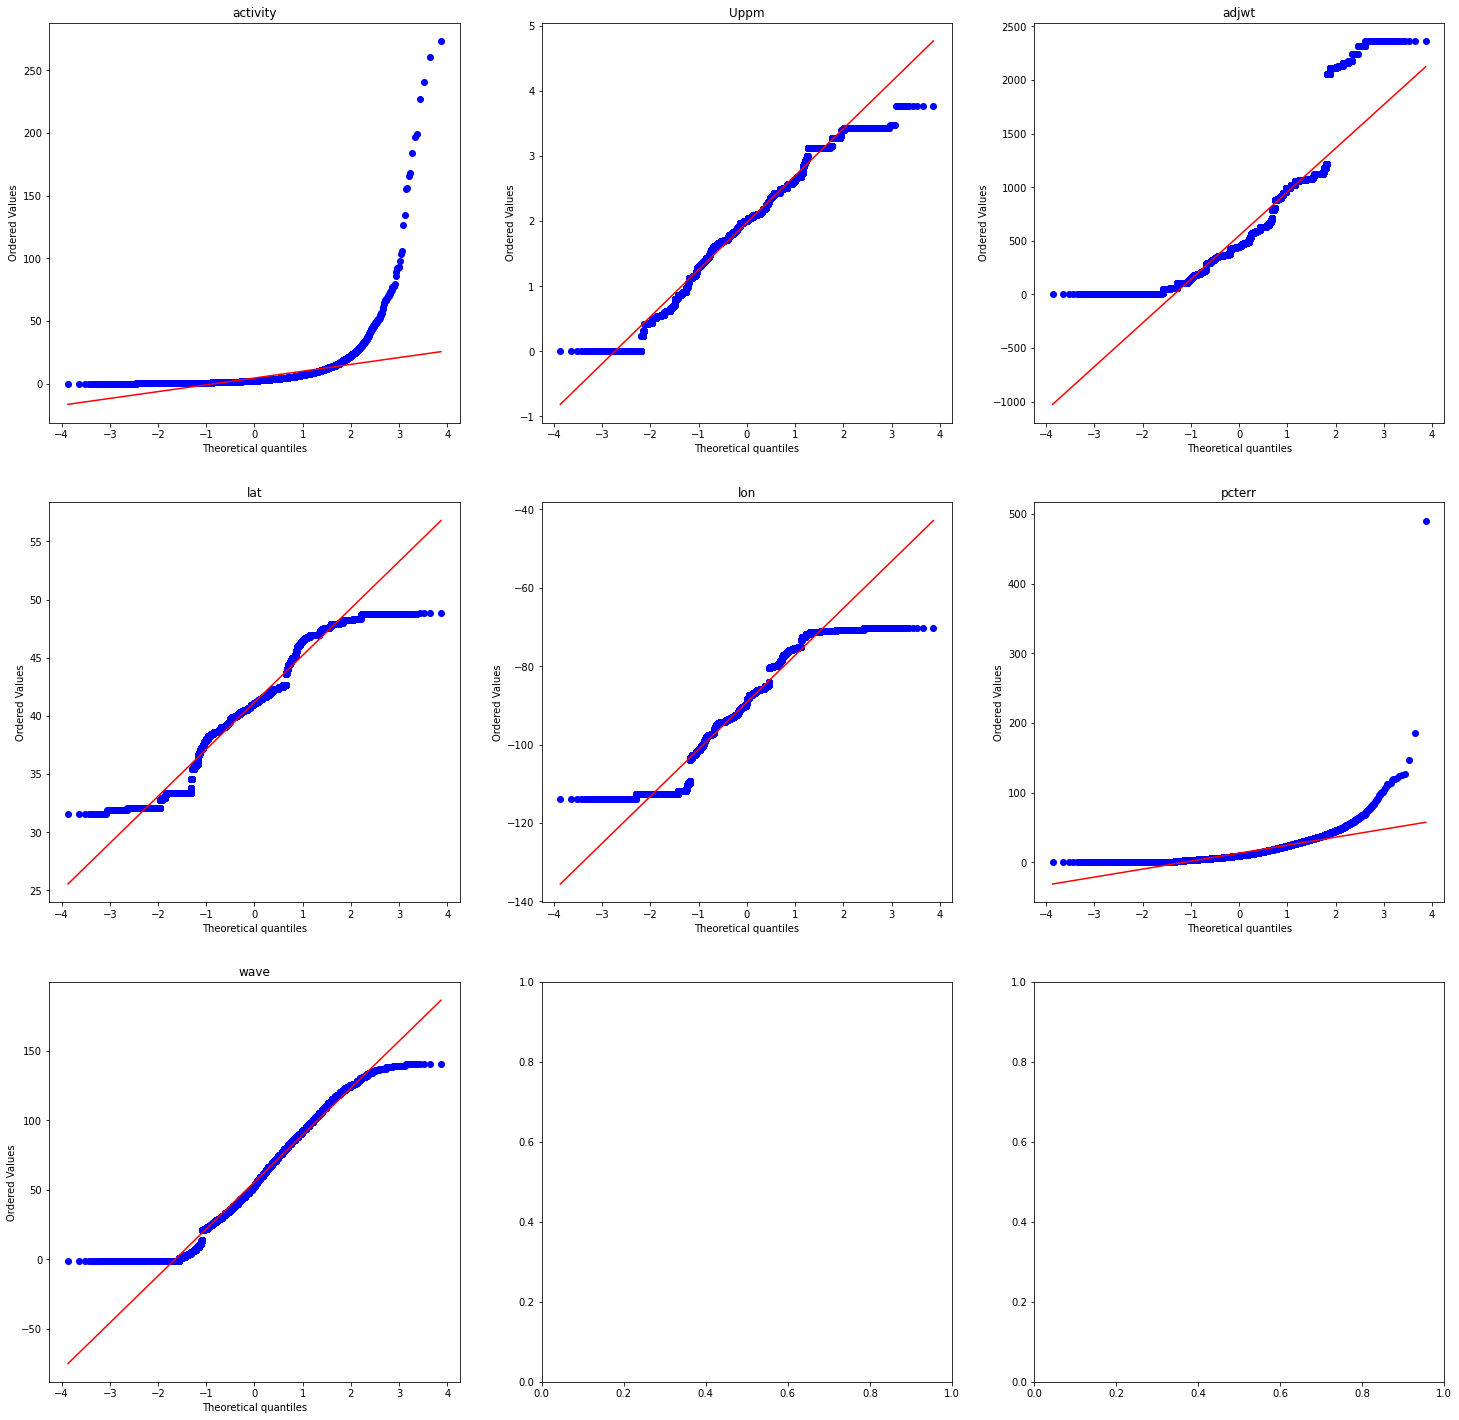

In [75]:
fig,axs = plt.subplots(3,3)
fig.set_size_inches(25,25)
i = 0
j = 0
for col in df_detect_outlier.columns:
  stats.probplot(df_detect_outlier[col],dist='norm',plot=axs[i,j])
  axs[i,j].set_title(col)
  j += 1
  if j == 3:
    i += 1
    j = 0

plt.show()

# เลือกใช้วิธี IQR 


In [76]:
df_outlier = df_detect_outlier[['activity','Uppm','adjwt','lat','pcterr']]
df_outlier

# เลือก 5 คอลัมน์ที่มี outlier ไปกำจัดต่อ 

,activity,Uppm,adjwt,lat,pcterr
0,1.600000,2.49759,292.219543,41.091000,12.7
1,0.500000,2.66527,364.958313,34.599998,0.0
2,3.000000,2.43343,626.564575,42.485001,9.7
3,0.600000,2.43343,570.611755,42.485001,27.6
4,1.200000,2.10811,426.798859,39.007999,23.5
...,...,...,...,...,...
12568,66.599998,2.67972,1065.307129,40.042000,1.4
12569,5.500000,3.28000,1074.013672,40.007000,7.1
12570,3.800000,1.54905,218.337860,46.977001,6.0
12571,3.700000,2.92643,2364.762695,40.210999,6.2


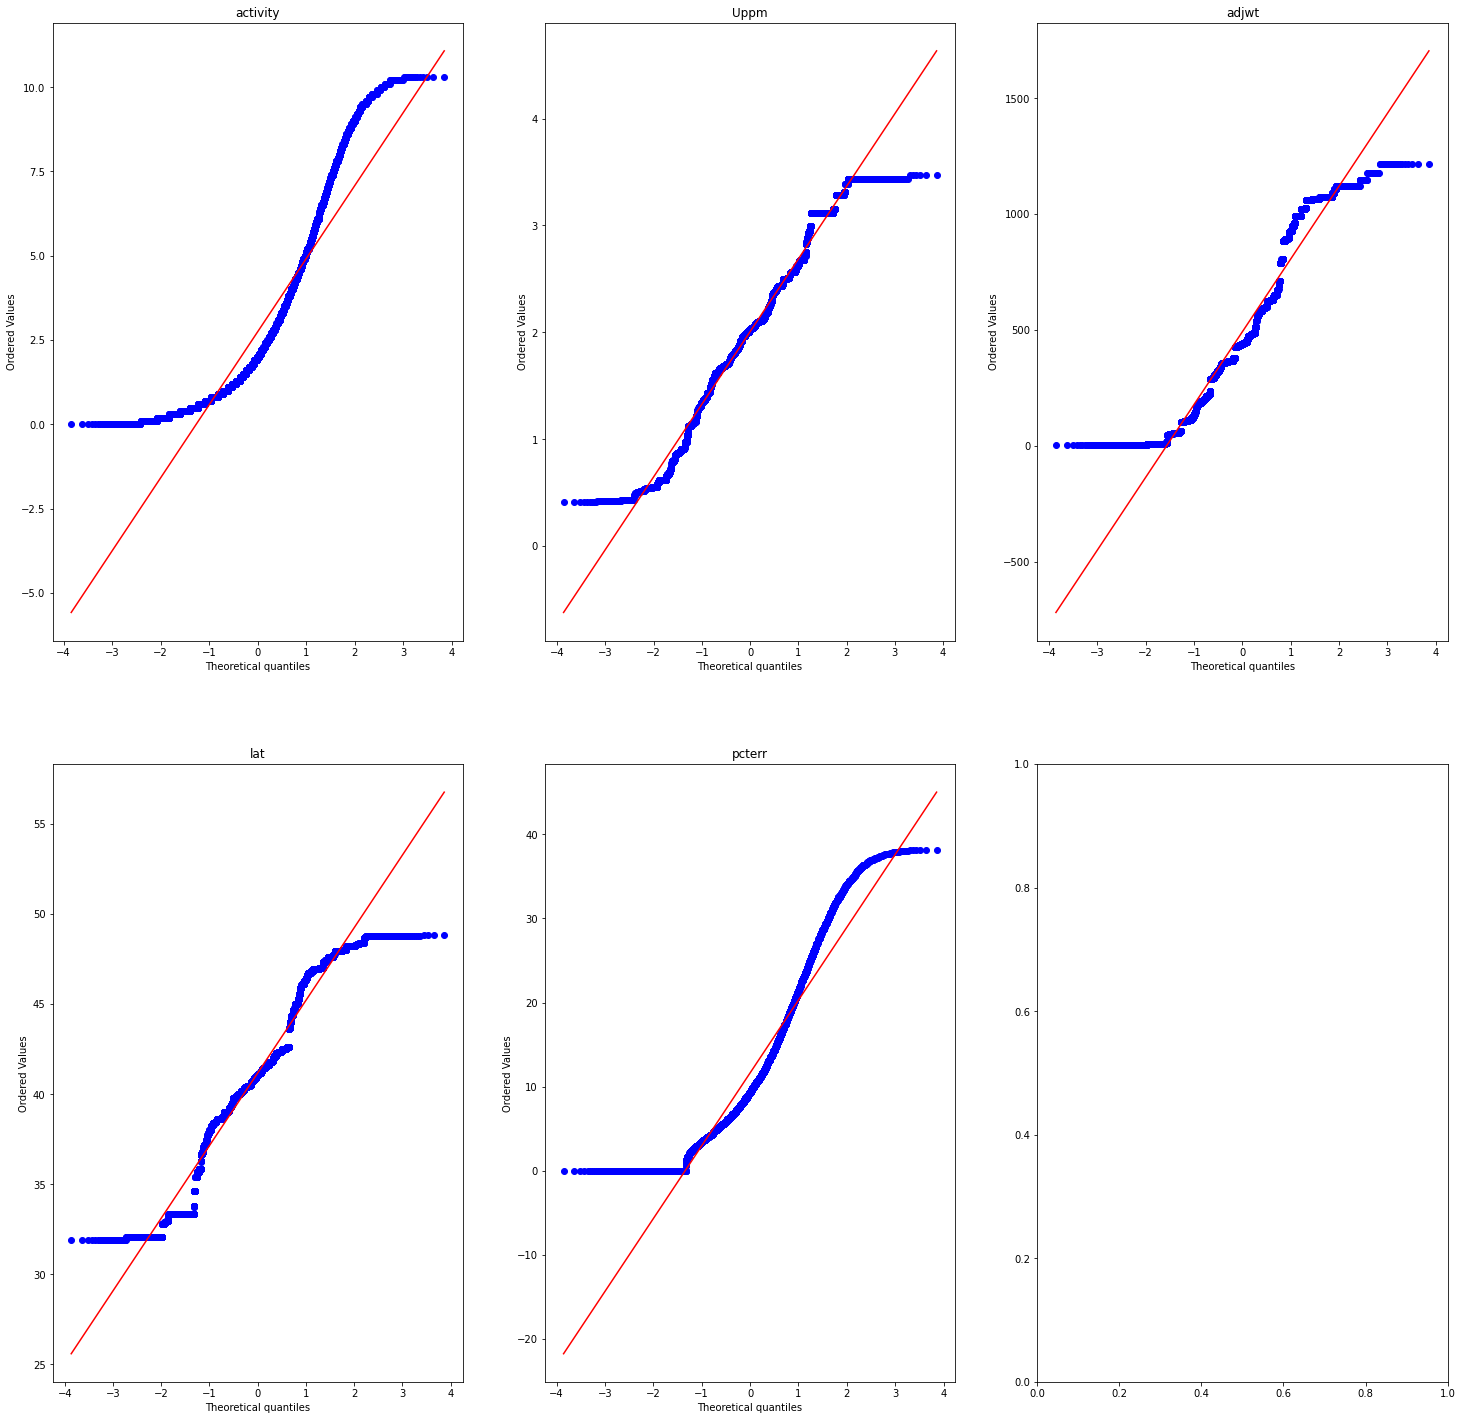

In [77]:
# remove outliners

fig,axs = plt.subplots(2,3)
fig.set_size_inches(25,25)
i = 0
j = 0

for col in df_outlier.columns:
  Q1 = df_outlier[col].quantile(0.25)
  Q3 = df_outlier[col].quantile(0.75)
  IQR = Q3-Q1
  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR
  mask = (df_outlier[col] < lower) | (df_outlier[col] > upper)

  stats.probplot(df_outlier[~mask][col],dist='norm',plot=axs[i,j])   # inverse mask --->remove outlier
  axs[i,j].set_title(col)
  j += 1
  if j == 3:
    i += 1
    j = 0

plt.show()

# เมื่อกำจัด outlier ออกแล้วข้อมูลมีความเป็น normal มากขึ้น

In [78]:
df_remove_outlier = df_outlier[~mask]  
df_remove_outlier 

# เหลือข้อมูล  12047 rows 

,activity,Uppm,adjwt,lat,pcterr
0,1.600000,2.49759,292.219543,41.091000,12.7
1,0.500000,2.66527,364.958313,34.599998,0.0
2,3.000000,2.43343,626.564575,42.485001,9.7
3,0.600000,2.43343,570.611755,42.485001,27.6
4,1.200000,2.10811,426.798859,39.007999,23.5
...,...,...,...,...,...
12568,66.599998,2.67972,1065.307129,40.042000,1.4
12569,5.500000,3.28000,1074.013672,40.007000,7.1
12570,3.800000,1.54905,218.337860,46.977001,6.0
12571,3.700000,2.92643,2364.762695,40.210999,6.2


In [79]:
# IQR Outliner Detection

outlinerIQR = dict()
for col in df_remove_outlier.columns:
  Q1 = df_remove_outlier[col].quantile(0.25)
  Q3 = df_remove_outlier[col].quantile(0.75)
  IQR = Q3-Q1
  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR
  mask = (df_remove_outlier[col] < lower) | (df_remove_outlier[col] > upper)
  outlinerIQR[col] = list(df_remove_outlier[mask][col].index)

for k,v in outlinerIQR.items():
  print(f'col={k},number of outliners = {len(v)}')

# เมื่อตรวจสอบแต่ละคอลัมน์อีกครั้งพบว่ายังมี outlier อยู่ แต่ว่าลดลง และกราฟมีความเป็น normal ขึ้น
# นำข้อมูลนี้ไปใช้ต่อ

col=activity,number of outliners = 1054
col=Uppm,number of outliners = 207
col=adjwt,number of outliners = 411
col=lat,number of outliners = 0
col=pcterr,number of outliners = 252


In [80]:
# ต่อคอลัมน์ที่กำจัด outlier แล้ว กลับเข้าไปใน data frame 


df_lw = df_detect_outlier[['lon','wave']]   #เป็น 2 คอลัมน์ไม่มี outlier ตั้งแต่แรก

df_without_outlier = pd.concat([df_remove_outlier , df_lw] ,axis=1, join='inner' )

df_without_outlier

# มีข้อมูล  12047 rows 
# เอา df นี้ไปใช้ต่อ
# จะยังไม่ reset index เนื่องจากจะนำไปต่อ กับ df_dummies ก่อน

,activity,Uppm,adjwt,lat,pcterr,lon,wave
0,1.600000,2.49759,292.219543,41.091000,12.7,-85.067001,92.0
1,0.500000,2.66527,364.958313,34.599998,0.0,-112.554001,56.0
2,3.000000,2.43343,626.564575,42.485001,9.7,-71.391998,23.0
3,0.600000,2.43343,570.611755,42.485001,27.6,-71.391998,62.0
4,1.200000,2.10811,426.798859,39.007999,23.5,-94.347000,91.0
...,...,...,...,...,...,...,...
12568,66.599998,2.67972,1065.307129,40.042000,1.4,-76.248001,110.0
12569,5.500000,3.28000,1074.013672,40.007000,7.1,-75.135002,40.0
12570,3.800000,1.54905,218.337860,46.977001,6.0,-100.469002,64.0
12571,3.700000,2.92643,2364.762695,40.210999,6.2,-75.367996,88.0


In [81]:
df = pd.concat([df_without_outlier, df_dummies], axis=1, join='inner')
df = df.reset_index(drop=True)
df

,activity,Uppm,adjwt,lat,pcterr,lon,wave,cntyfips_1,cntyfips_3,cntyfips_5,cntyfips_7,cntyfips_9,cntyfips_11,cntyfips_12,cntyfips_13,cntyfips_15,cntyfips_17,cntyfips_19,cntyfips_21,cntyfips_23,cntyfips_25,cntyfips_27,cntyfips_29,cntyfips_31,cntyfips_33,cntyfips_35,cntyfips_37,cntyfips_39,cntyfips_41,cntyfips_43,cntyfips_45,cntyfips_47,cntyfips_49,cntyfips_51,cntyfips_53,cntyfips_55,cntyfips_57,cntyfips_59,cntyfips_61,cntyfips_63,cntyfips_65,cntyfips_67,cntyfips_69,cntyfips_71,cntyfips_73,cntyfips_75,cntyfips_77,cntyfips_79,cntyfips_81,cntyfips_83,cntyfips_85,cntyfips_87,cntyfips_89,cntyfips_91,cntyfips_93,cntyfips_95,cntyfips_97,cntyfips_99,cntyfips_101,cntyfips_103,cntyfips_105,cntyfips_107,cntyfips_109,cntyfips_111,cntyfips_113,cntyfips_115,cntyfips_117,cntyfips_119,cntyfips_121,cntyfips_123,cntyfips_125,cntyfips_127,cntyfips_129,cntyfips_131,cntyfips_133,cntyfips_135,cntyfips_137,cntyfips_139,cntyfips_141,cntyfips_143,cntyfips_145,cntyfips_147,cntyfips_149,cntyfips_151,cntyfips_153,cntyfips_155,cntyfips_157,cntyfips_159,cntyfips_161,cntyfips_163,cntyfips_165,cntyfips_167,cntyfips_169,cntyfips_171,cntyfips_173,cntyfips_175,cntyfips_177,cntyfips_179,cntyfips_181,cntyfips_183,cntyfips_185,cntyfips_186,cntyfips_187,cntyfips_189,cntyfips_195,cntyfips_197,cntyfips_199,cntyfips_201,cntyfips_203,cntyfips_205,cntyfips_207,cntyfips_209,cntyfips_211,cntyfips_213,cntyfips_215,cntyfips_217,cntyfips_219,cntyfips_221,cntyfips_223,cntyfips_225,cntyfips_227,cntyfips_229,cntyfips_510,county_,county_ADAIR,county_ADAMS,county_AITKIN,county_ALLEGHENY,county_ALLEN,county_ANDREW,county_ANOKA,county_APACHE,county_ARMSTRONG,county_ATCHISON,county_AUDRAIN,county_BAD RIVER,county_BARNES,county_BARNSTABLE,county_BARRY,county_BARTHOLOMEW,county_BARTON,county_BATES,county_BAY MILLS,county_BEAVER,county_BECKER,county_BEDFORD,county_BELTRAMI,county_BENSON,county_BENTON,county_BERKS,county_BERKSHIRE,county_BIG STONE,county_BILLINGS,county_BLACKFORD,county_BLAIR,county_BLUE EARTH,county_BOIS FORTE,county_BOLLINGER,county_BOONE,county_BOTTINEAU,county_BOWMAN,county_BRADFORD,county_BRISTOL,county_BROWN,county_BUCHANAN,county_BUCKS,county_BURKE,county_BURLEIGH,county_BUTLER,county_CALDWELL,county_CALLAWAY,county_CAMBRIA,county_CAMDEN,county_CAMERON,county_CAPE GIRARDEAU,county_CARBON,county_CARLTON,county_CARROLL,county_CARTER,county_CARVER,county_CASS,county_CAVALIER,county_CEDAR,county_CENTRE,county_CHARITON,county_CHESTER,county_CHIPPEWA,county_CHISAGO,county_CHRISTIAN,county_CLARION,county_CLARK,county_CLAY,county_CLEARFIELD,county_CLEARWATER,county_CLINTON,county_COCHISE,county_COCONINO,county_COLE,county_COLUMBIA,county_COOK,county_COOPER,county_COTTONWOOD,county_CRAWFORD,county_CROW WING,county_CUMBERLAND,county_DADE,county_DAKOTA,county_DALLAS,county_DAUPHIN,county_DAVIESS,county_DE KALB,county_DEARBORN,county_DECATUR,county_DELAWARE,county_DENT,county_DICKEY,county_DIVIDE,county_DODGE,county_DOUGLAS,county_DUBOIS,county_DUKES,county_DUNKLIN,county_DUNN,county_EDDY,county_ELK,county_ELKHART,county_EMMONS,county_ERIE,county_ESSEX,county_FARIBAULT,county_FAYETTE,county_FILLMORE,county_FLOYD,county_FOND DU LAC,county_FOREST,county_FOREST COUNTY,county_FOSTER,county_FOUNTAIN,county_FRANKLIN,county_FREEBORN,county_FULTON,county_GASCONADE,county_GENTRY,county_GIBSON,county_GILA,county_GOLDEN VALLEY,county_GOODHUE,county_GRAHAM,county_GRAND FORKS,county_GRAND PORTAGE,county_GRAND TRAVERSE,county_GRANT,county_GREENE,county_GREENLEE,county_GRIGGS,county_GRUNDY,county_HAMILTON,county_HAMPDEN,county_HAMPSHIRE,county_HANCOCK,county_HANNAHVILLE,county_HARRISON,county_HENDRICKS,county_HENNEPIN,county_HENRY,county_HETTINGER,county_HICKORY,county_HOLT,county_HOUSTON,county_HOWARD,county_HOWELL,county_HUBBARD,county_HUNTINGDON,county_HUNTINGTON,county_INDIANA,county_IRON,county_ISANTI,county_ITASCA,county_JACKSON,county_JASPER,county_JAY,county_JEFFERSON,county_JENNINGS,county_JOHNSON,county_JUNIATA,county_KANABEC,county_KANDIYOHI,county_KEWEENAW BAY,county_KIDDER,count

# feature scale

In [82]:
# เลือกเฉพาะตัวแปร X ที่เป็น float ทำ feature scale

df_float = df[['Uppm','adjwt','lat','pcterr','lon','wave']]
df_float

,Uppm,adjwt,lat,pcterr,lon,wave
0,2.49759,292.219543,41.091000,12.7,-85.067001,92.0
1,2.66527,364.958313,34.599998,0.0,-112.554001,56.0
2,2.43343,626.564575,42.485001,9.7,-71.391998,23.0
3,2.43343,570.611755,42.485001,27.6,-71.391998,62.0
4,2.10811,426.798859,39.007999,23.5,-94.347000,91.0
...,...,...,...,...,...,...
12042,2.67972,1065.307129,40.042000,1.4,-76.248001,110.0
12043,3.28000,1074.013672,40.007000,7.1,-75.135002,40.0
12044,1.54905,218.337860,46.977001,6.0,-100.469002,64.0
12045,2.92643,2364.762695,40.210999,6.2,-75.367996,88.0


In [83]:
# StandardScaler()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df_float),columns= df_float.columns)
df_sc

,Uppm,adjwt,lat,pcterr,lon,wave
0,0.729356,-0.583458,-0.033418,0.118737,0.337779,1.065618
1,0.961446,-0.418901,-1.612343,-1.289643,-1.915093,0.010905
2,0.640550,0.172931,0.305671,-0.213951,1.458600,-0.955916
3,0.640550,0.046349,0.305671,1.771089,1.458600,0.186690
4,0.190266,-0.278999,-0.540104,1.316415,-0.422823,1.036321
...,...,...,...,...,...,...
12042,0.981447,1.165498,-0.288585,-1.134388,1.060596,1.592975
12043,1.812311,1.185195,-0.297099,-0.502281,1.151819,-0.457857
12044,-0.583545,-0.750600,1.398342,-0.624267,-0.924590,0.245286
12045,1.322925,4.105256,-0.247477,-0.602087,1.132722,0.948428


In [84]:
#ต่อคอลัมน์

df_no_sc = df.drop(['Uppm','adjwt','lat','pcterr','lon','wave'], axis=1)

df = pd.concat([df_sc, df_no_sc], axis=1 , join='inner' )

df

,Uppm,adjwt,lat,pcterr,lon,wave,activity,cntyfips_1,cntyfips_3,cntyfips_5,cntyfips_7,cntyfips_9,cntyfips_11,cntyfips_12,cntyfips_13,cntyfips_15,cntyfips_17,cntyfips_19,cntyfips_21,cntyfips_23,cntyfips_25,cntyfips_27,cntyfips_29,cntyfips_31,cntyfips_33,cntyfips_35,cntyfips_37,cntyfips_39,cntyfips_41,cntyfips_43,cntyfips_45,cntyfips_47,cntyfips_49,cntyfips_51,cntyfips_53,cntyfips_55,cntyfips_57,cntyfips_59,cntyfips_61,cntyfips_63,cntyfips_65,cntyfips_67,cntyfips_69,cntyfips_71,cntyfips_73,cntyfips_75,cntyfips_77,cntyfips_79,cntyfips_81,cntyfips_83,cntyfips_85,cntyfips_87,cntyfips_89,cntyfips_91,cntyfips_93,cntyfips_95,cntyfips_97,cntyfips_99,cntyfips_101,cntyfips_103,cntyfips_105,cntyfips_107,cntyfips_109,cntyfips_111,cntyfips_113,cntyfips_115,cntyfips_117,cntyfips_119,cntyfips_121,cntyfips_123,cntyfips_125,cntyfips_127,cntyfips_129,cntyfips_131,cntyfips_133,cntyfips_135,cntyfips_137,cntyfips_139,cntyfips_141,cntyfips_143,cntyfips_145,cntyfips_147,cntyfips_149,cntyfips_151,cntyfips_153,cntyfips_155,cntyfips_157,cntyfips_159,cntyfips_161,cntyfips_163,cntyfips_165,cntyfips_167,cntyfips_169,cntyfips_171,cntyfips_173,cntyfips_175,cntyfips_177,cntyfips_179,cntyfips_181,cntyfips_183,cntyfips_185,cntyfips_186,cntyfips_187,cntyfips_189,cntyfips_195,cntyfips_197,cntyfips_199,cntyfips_201,cntyfips_203,cntyfips_205,cntyfips_207,cntyfips_209,cntyfips_211,cntyfips_213,cntyfips_215,cntyfips_217,cntyfips_219,cntyfips_221,cntyfips_223,cntyfips_225,cntyfips_227,cntyfips_229,cntyfips_510,county_,county_ADAIR,county_ADAMS,county_AITKIN,county_ALLEGHENY,county_ALLEN,county_ANDREW,county_ANOKA,county_APACHE,county_ARMSTRONG,county_ATCHISON,county_AUDRAIN,county_BAD RIVER,county_BARNES,county_BARNSTABLE,county_BARRY,county_BARTHOLOMEW,county_BARTON,county_BATES,county_BAY MILLS,county_BEAVER,county_BECKER,county_BEDFORD,county_BELTRAMI,county_BENSON,county_BENTON,county_BERKS,county_BERKSHIRE,county_BIG STONE,county_BILLINGS,county_BLACKFORD,county_BLAIR,county_BLUE EARTH,county_BOIS FORTE,county_BOLLINGER,county_BOONE,county_BOTTINEAU,county_BOWMAN,county_BRADFORD,county_BRISTOL,county_BROWN,county_BUCHANAN,county_BUCKS,county_BURKE,county_BURLEIGH,county_BUTLER,county_CALDWELL,county_CALLAWAY,county_CAMBRIA,county_CAMDEN,county_CAMERON,county_CAPE GIRARDEAU,county_CARBON,county_CARLTON,county_CARROLL,county_CARTER,county_CARVER,county_CASS,county_CAVALIER,county_CEDAR,county_CENTRE,county_CHARITON,county_CHESTER,county_CHIPPEWA,county_CHISAGO,county_CHRISTIAN,county_CLARION,county_CLARK,county_CLAY,county_CLEARFIELD,county_CLEARWATER,county_CLINTON,county_COCHISE,county_COCONINO,county_COLE,county_COLUMBIA,county_COOK,county_COOPER,county_COTTONWOOD,county_CRAWFORD,county_CROW WING,county_CUMBERLAND,county_DADE,county_DAKOTA,county_DALLAS,county_DAUPHIN,county_DAVIESS,county_DE KALB,county_DEARBORN,county_DECATUR,county_DELAWARE,county_DENT,county_DICKEY,county_DIVIDE,county_DODGE,county_DOUGLAS,county_DUBOIS,county_DUKES,county_DUNKLIN,county_DUNN,county_EDDY,county_ELK,county_ELKHART,county_EMMONS,county_ERIE,county_ESSEX,county_FARIBAULT,county_FAYETTE,county_FILLMORE,county_FLOYD,county_FOND DU LAC,county_FOREST,county_FOREST COUNTY,county_FOSTER,county_FOUNTAIN,county_FRANKLIN,county_FREEBORN,county_FULTON,county_GASCONADE,county_GENTRY,county_GIBSON,county_GILA,county_GOLDEN VALLEY,county_GOODHUE,county_GRAHAM,county_GRAND FORKS,county_GRAND PORTAGE,county_GRAND TRAVERSE,county_GRANT,county_GREENE,county_GREENLEE,county_GRIGGS,county_GRUNDY,county_HAMILTON,county_HAMPDEN,county_HAMPSHIRE,county_HANCOCK,county_HANNAHVILLE,county_HARRISON,county_HENDRICKS,county_HENNEPIN,county_HENRY,county_HETTINGER,county_HICKORY,county_HOLT,county_HOUSTON,county_HOWARD,county_HOWELL,county_HUBBARD,county_HUNTINGDON,county_HUNTINGTON,county_INDIANA,county_IRON,county_ISANTI,county_ITASCA,county_JACKSON,county_JASPER,county_JAY,county_JEFFERSON,county_JENNINGS,county_JOHNSON,county_JUNIATA,county_KANABEC,county_KANDIYOHI,county_KEWEENAW BAY,county_KIDDER,count

# แบ่ง dataset

In [85]:
# ทําการแบ่ง dataset เป็นกลุ่มๆ train (7,000 ตัว), validation (3,000 ตัว) และ test set (ข้อมูลที่เหลือ)

X = df.loc[:, df.columns != 'activity']
y = df.loc[:, df.columns == 'activity']

# Input 
X_train = X[:7000]
X_val = X[7000:10000]
X_test = X[10000:]

# Target 
y_train = y[:7000]
y_val = y[7000:10000]
y_test = y[10000:]

print("Xtrain ", X_train.shape)
print("Xval ", X_val.shape)
print("Xtest ", X_test.shape)
print()
print("ytrain ", y_train.shape)
print("yval ", y_val.shape)
print("ytest ", y_test.shape)

Xtrain  (7000, 594)
Xval  (3000, 594)
Xtest  (2047, 594)

ytrain  (7000, 1)
yval  (3000, 1)
ytest  (2047, 1)


# Base Model

 - base model  กำหนด 1 hidden layer 8 node ,  epoch=100  , bath size=512  

In [86]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import models, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout

tf.random.set_seed(42)

# build the model
model = models.Sequential()
model.add(Dense(8, activation='relu', input_shape=(594,)))    #594 input
model.add(Dense(1, activation='relu'))  # regression problem : y>0

# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])   # regression problem 

# train the model with validation set 
history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val))


Epoch 1/100
14/14 [==============================] - 1s 41ms/step - loss: 114.2156 - mae: 4.6827 - val_loss: 129.4250 - val_mae: 4.5948
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 113.9245 - mae: 4.6513 - val_loss: 128.8638 - val_mae: 4.5279
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 113.0631 - mae: 4.5573 - val_loss: 127.7547 - val_mae: 4.4083
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 111.6650 - mae: 4.4200 - val_loss: 126.1314 - val_mae: 4.2585
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 110.0104 - mae: 4.2679 - val_loss: 124.4575 - val_mae: 4.1024
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 108.2185 - mae: 4.1070 - val_loss: 122.6218 - val_mae: 3.9321
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 106.3179 - mae: 3.9308 - val_loss: 120.6128 - val_mae: 3.7529
Epoch 8/100
14/14 [==============================] 

In [87]:
df_hist= pd.DataFrame.from_dict(history.history)
history.params
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

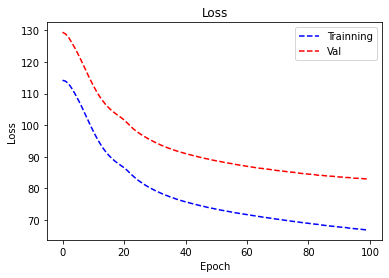

In [88]:
df_hist['loss'].plot(style='b--',label='Trainning')
df_hist['val_loss'].plot(style='r--',label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

# จากกราฟจะเห็นว่า loss ของ Train เมื่อจำนวน Epoch เพิ่มขึ้น loss ยิ่งตำ่ลง เช่นเดียวกับ loss ของ Val 
# และจากกราฟ loss ยังมีแนวโน้มที่จะลงอีก ดังนั้น เพิ่มรอบการ train

In [89]:
score=model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1])

Test loss: 32.214500427246094
Test mae: 3.0296406745910645


# Model 2

 - model2  กำหนด 2 hidden layer 8 node ,  epoch=150  , bath size=512 (มีการเพิ่มจำนวน epoch และ hidden layer)

In [90]:
tf.random.set_seed(42)

# build the model
model2 = models.Sequential()
model2.add(Dense(8, activation='relu', input_shape=(594,)))    #594 input
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1, activation='relu'))  # regression problem : y>0

# compile the model
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])   # regression problem 

# train the model with validation set 
history = model2.fit(X_train, y_train, epochs=150, batch_size=512, validation_data=(X_val, y_val))
 

Epoch 1/150
14/14 [==============================] - 1s 36ms/step - loss: 113.6790 - mae: 4.6321 - val_loss: 128.2355 - val_mae: 4.4894
Epoch 2/150
14/14 [==============================] - 0s 9ms/step - loss: 112.2364 - mae: 4.4911 - val_loss: 126.4367 - val_mae: 4.3061
Epoch 3/150
14/14 [==============================] - 0s 9ms/step - loss: 110.1774 - mae: 4.2866 - val_loss: 124.1019 - val_mae: 4.0767
Epoch 4/150
14/14 [==============================] - 0s 8ms/step - loss: 107.5517 - mae: 4.0417 - val_loss: 121.1255 - val_mae: 3.8089
Epoch 5/150
14/14 [==============================] - 0s 8ms/step - loss: 104.2041 - mae: 3.7687 - val_loss: 117.5446 - val_mae: 3.5448
Epoch 6/150
14/14 [==============================] - 0s 8ms/step - loss: 100.3576 - mae: 3.5236 - val_loss: 113.7523 - val_mae: 3.3572
Epoch 7/150
14/14 [==============================] - 0s 8ms/step - loss: 96.6953 - mae: 3.3796 - val_loss: 110.1719 - val_mae: 3.2921
Epoch 8/150
14/14 [==============================] - 0s

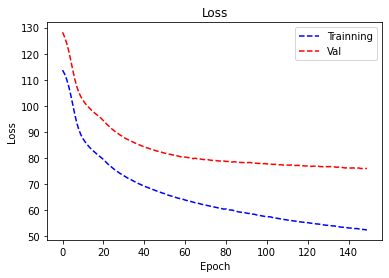

In [91]:
df_hist= pd.DataFrame.from_dict(history.history)
df_hist['loss'].plot(style='b--',label='Trainning')
df_hist['val_loss'].plot(style='r--',label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

# จากกราฟจะเห็นว่า loss ของ Train เมื่อจำนวน Epoch เพิ่มขึ้น loss ยิ่งตำ่ลง ส่วน loss ของ Val เริ่มคงที่
# จากกราฟ loss ยังมีแนวโน้มที่จะลงอีก ดังนั้น เพิ่มรอบการ train

In [92]:
score=model2.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1])

# เทียบกับ base model mae ต่ำลง แต่ loss สูงขึ้น

Test loss: 33.34931182861328
Test mae: 2.9152474403381348


# Model 3

 - model3   กำหนด 2 hidden layer 8 node ,  epoch=1000  , bath size=512 , Early Stopping ทำการ Train อย่างน้อย 50 epoch
(มีการเพิ่มจำนวน epoch และ Early Stopping)

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)  #train อย่างน้อย 50 epoch

# build the model
model3 = models.Sequential()
model3.add(Dense(8, activation='relu', input_shape=(594,)))    #594 input
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1, activation='relu'))  # regression problem : y>0

# compile the model
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])   # regression problem 

# train the model with validation set 
history = model3.fit(X_train, y_train, epochs=1000, batch_size=512, validation_data=(X_val, y_val), callbacks=[es])

# หยุด Train รอบที่ 146

Epoch 1/1000
14/14 [==============================] - 1s 40ms/step - loss: 114.1702 - mae: 4.6757 - val_loss: 129.2459 - val_mae: 4.5756
Epoch 2/1000
14/14 [==============================] - 0s 11ms/step - loss: 113.3653 - mae: 4.5988 - val_loss: 127.7499 - val_mae: 4.4283
Epoch 3/1000
14/14 [==============================] - 0s 11ms/step - loss: 111.3847 - mae: 4.4071 - val_loss: 125.5401 - val_mae: 4.2080
Epoch 4/1000
14/14 [==============================] - 0s 10ms/step - loss: 108.9442 - mae: 4.1719 - val_loss: 122.9027 - val_mae: 3.9596
Epoch 5/1000
14/14 [==============================] - 0s 11ms/step - loss: 106.0928 - mae: 3.9214 - val_loss: 119.9768 - val_mae: 3.7078
Epoch 6/1000
14/14 [==============================] - 0s 11ms/step - loss: 103.0041 - mae: 3.6816 - val_loss: 116.9191 - val_mae: 3.4916
Epoch 7/1000
14/14 [==============================] - 0s 9ms/step - loss: 99.9595 - mae: 3.4893 - val_loss: 113.8285 - val_mae: 3.3401
Epoch 8/1000
14/14 [=======================

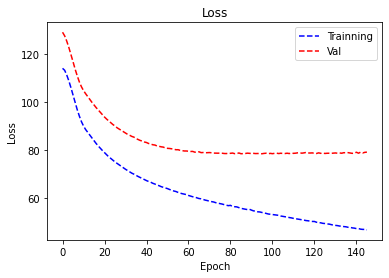

In [94]:
df_hist= pd.DataFrame.from_dict(history.history)
df_hist['loss'].plot(style='b--',label='Trainning')
df_hist['val_loss'].plot(style='r--',label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

# loss ของ Train มีแนวโน้มต่ำลงอีก กลับกัน loss ของ val เริ่มคงที่ เนื่องจากมีการใช้ Early Stopping ที่จะหยุดในรอบที่ val loss ต่ำสุด 

In [95]:
score=model3.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1])

# เทียบกับ base model และ model 2 mae และ loss สูงขึ้น

Test loss: 33.67271423339844
Test mae: 3.0987119674682617


# Model 4

 - เนื่องจาก model 2 loss ของ Train มีแนวโน้มที่จะลดลงอีก ดังนั้นจึงเพิ่มความซับซ้อนของ model ขึ้น และมีการป้องกันการเกิด Overfitting ด้วย l2

 - model4   กำหนด 2 hidden layer 16 และ 32 node ,  epoch=400  , bath size=256 , ป้องกัน Overfiiting ด้วยการกดค่า Weight ใช้ l2 regulariztion


In [96]:
tf.random.set_seed(42)

# build the model
model4 = models.Sequential()
model4.add(Dense(16, activation='relu', kernel_regularizer=l2(0.1), input_shape=(594,)))    #594 input
model4.add(Dense(32,activation='relu', kernel_regularizer=l2(0.1)))
model4.add(Dense(1, activation='relu'))  # regression problem : y>0

# compile the model
model4.compile(optimizer='adam', loss='mse', metrics=['mae'])   # regression problem 

# train the model with validation set 
history = model4.fit(X_train, y_train, epochs=400, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/400
28/28 [==============================] - 1s 19ms/step - loss: 115.0688 - mae: 4.2994 - val_loss: 125.0281 - val_mae: 3.8059
Epoch 2/400
28/28 [==============================] - 0s 6ms/step - loss: 103.2060 - mae: 3.5830 - val_loss: 111.2546 - val_mae: 3.4036
Epoch 3/400
28/28 [==============================] - 0s 6ms/step - loss: 91.8407 - mae: 3.6816 - val_loss: 104.1902 - val_mae: 3.7521
Epoch 4/400
28/28 [==============================] - 0s 6ms/step - loss: 86.7996 - mae: 3.6560 - val_loss: 99.9966 - val_mae: 3.3892
Epoch 5/400
28/28 [==============================] - 0s 5ms/step - loss: 83.4948 - mae: 3.3623 - val_loss: 97.1681 - val_mae: 3.3024
Epoch 6/400
28/28 [==============================] - 0s 5ms/step - loss: 81.2689 - mae: 3.3048 - val_loss: 95.3272 - val_mae: 3.2331
Epoch 7/400
28/28 [==============================] - 0s 5ms/step - loss: 79.6643 - mae: 3.2719 - val_loss: 93.4118 - val_mae: 3.0926
Epoch 8/400
28/28 [==============================] - 0s 5ms/ste

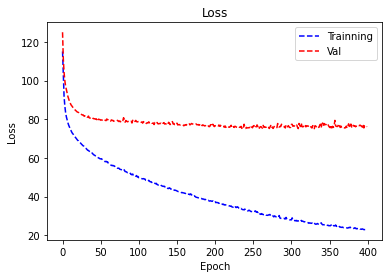

In [97]:
df_hist= pd.DataFrame.from_dict(history.history)
df_hist['loss'].plot(style='b--',label='Trainning')
df_hist['val_loss'].plot(style='r--',label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [98]:
score=model4.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1])

#เมื่อเทียบกับ 3 model ที่ผ่านมา ค่า mae ต่ำที่สุด แต่กลับกัน loss กลับมากที่สุด

Test loss: 50.46385955810547
Test mae: 1.940556526184082


# Model 5

- เพิ่มความซับซ้อนของ model ขึ้น และมีการป้องกันการเกิด Overfitting ด้วย l2 ที่ 0.1 และ Dropout ที่ 0.2,0.3 และ 0.4 ในแต่ละ hidden layers

- model5  กำหนด 3 hidden layer 32,64 และ 128 node ,  epoch=1000  , bath size=256 

In [99]:
tf.random.set_seed(42)

# build the model
model5 = models.Sequential()
model5.add(Dense(32, activation='relu', kernel_regularizer=l2(0.1), input_shape=(594,))) #594 input
model5.add(Dropout(0.2))
model5.add(Dense(64,activation='relu', kernel_regularizer=l2(0.1)))
model5.add(Dropout(0.3))
model5.add(Dense(128,activation='relu', kernel_regularizer=l2(0.1)))
model5.add(Dropout(0.4))
model4.add(Dense(1, activation='relu'))  # regression problem : y>0

# compile the model
model5.compile(optimizer='adam', loss='mse', metrics=['mae'])   # regression problem 

# train the model with validation set 
history = model5.fit(X_train, y_train, epochs=1000, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/1000
28/28 [==============================] - 1s 20ms/step - loss: 128.2479 - mae: 4.6297 - val_loss: 139.2067 - val_mae: 4.5075
Epoch 2/1000
28/28 [==============================] - 0s 7ms/step - loss: 119.8681 - mae: 4.4175 - val_loss: 128.8762 - val_mae: 3.8889
Epoch 3/1000
28/28 [==============================] - 0s 8ms/step - loss: 108.8484 - mae: 4.1010 - val_loss: 113.6388 - val_mae: 3.1899
Epoch 4/1000
28/28 [==============================] - 0s 7ms/step - loss: 103.3087 - mae: 4.0278 - val_loss: 110.8028 - val_mae: 3.0340
Epoch 5/1000
28/28 [==============================] - 0s 7ms/step - loss: 100.8245 - mae: 3.9040 - val_loss: 107.9852 - val_mae: 2.9740
Epoch 6/1000
28/28 [==============================] - 0s 7ms/step - loss: 98.9149 - mae: 3.8918 - val_loss: 106.2651 - val_mae: 2.9300
Epoch 7/1000
28/28 [==============================] - 0s 7ms/step - loss: 98.1402 - mae: 3.8728 - val_loss: 105.6638 - val_mae: 2.9417
Epoch 8/1000
28/28 [=============================

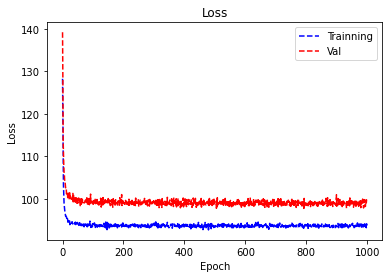

In [101]:
df_hist= pd.DataFrame.from_dict(history.history)
df_hist['loss'].plot(style='b--',label='Trainning')
df_hist['val_loss'].plot(style='r--',label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [102]:
score=model5.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1])

Test loss: 43.11077880859375
Test mae: 2.5201797485351562


# model 6

 - เมื่อพิจารณาดูแล้ว จากการ Train model ก่อนหน้า พบว่า moddel 2 ทำได้ดีที่สุด ถึงแม้ค่า mae จะไม่ได้ต่ำสุด แต่ก็ยังต่ำกว่าหลาย ๆ model และยัง ได้ loss จากการ Train ไม่มากไปอีกด้วย ดังนั้นจึงจะนำ model 2 มา improve ต่อ โดยการเพิ่ม epoch เป็น 500 ,l2=0.1 และมีการเรียกใช้ Early Stopping
 
 - model6  กำหนด 2 hidden layer 8 node ,  epoch=300  , bath size=512 , l2=0.01 , Early Stopping


In [106]:
tf.random.set_seed(42)

# build the model
model6 = models.Sequential()
model6.add(Dense(8, activation='relu',kernel_regularizer=l2(0.1), input_shape=(594,)))    #594 input
model6.add(Dense(8,activation='relu', kernel_regularizer=l2(0.1)))
model6.add(Dense(1, activation='relu'))  # regression problem : y>0

# compile the model
model6.compile(optimizer='adam', loss='mse', metrics=['mae'])   # regression problem 

# train the model with validation set 
history = model6.fit(X_train, y_train, epochs=500, batch_size=512, validation_data=(X_val, y_val),callbacks=[es])

Epoch 1/500
14/14 [==============================] - 1s 34ms/step - loss: 115.2111 - mae: 4.5627 - val_loss: 129.2629 - val_mae: 4.3802
Epoch 2/500
14/14 [==============================] - 0s 8ms/step - loss: 112.5674 - mae: 4.3439 - val_loss: 126.3954 - val_mae: 4.1270
Epoch 3/500
14/14 [==============================] - 0s 8ms/step - loss: 109.3442 - mae: 4.0663 - val_loss: 122.9400 - val_mae: 3.8244
Epoch 4/500
14/14 [==============================] - 0s 8ms/step - loss: 105.6074 - mae: 3.7597 - val_loss: 118.9823 - val_mae: 3.5232
Epoch 5/500
14/14 [==============================] - 0s 9ms/step - loss: 101.4092 - mae: 3.4972 - val_loss: 114.8219 - val_mae: 3.3309
Epoch 6/500
14/14 [==============================] - 0s 9ms/step - loss: 96.9993 - mae: 3.3563 - val_loss: 110.5772 - val_mae: 3.2960
Epoch 7/500
14/14 [==============================] - 0s 8ms/step - loss: 93.1135 - mae: 3.4057 - val_loss: 107.0519 - val_mae: 3.4288
Epoch 8/500
14/14 [==============================] - 0s 

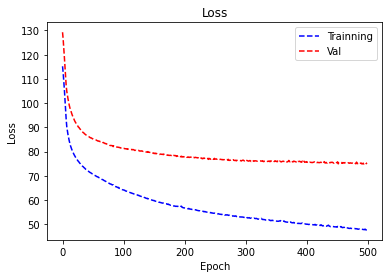

In [107]:
df_hist= pd.DataFrame.from_dict(history.history)
df_hist['loss'].plot(style='b--',label='Trainning')
df_hist['val_loss'].plot(style='r--',label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [117]:
score=model6.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test mae:", score[1])

Test loss: 50.185218811035156
Test mae: 2.5186593532562256


# Predict  X test ตัวแรก

In [115]:
pred = model6.predict(X_test[0:1])

print("predicted value", pred)

1/1 [==============================] - 0s 24ms/step
predicted value [[4.791056]]


In [116]:
print("actual value", y_test[0:1])

actual value        activity
10000       4.2


# สรุป

 1. ข้อมูลไม่มี missing value
 2. ไม่มี idnum ที่ซ้ำกันเลย และมีการ drop คอลัมน์ 'idnum','stfips','startdt','starttm','stopdt','stoptm','zip' ทิ้ง เนื่องจากคิดว่า ไม่สามารถอธิบายค่า y ได้ และ 'windoor' ที่ไม่มีข้อมูลในคอลัมน์เลย
 3. target คือ activty (ระดับเรดอนที่วัดได้ในบ้านของสหรัฐฯ) , feature 19 ตัว และ n = 12573
 4. y เป็นปัญหา regression ที่มีค่าต่ำสุดที่ 0 ดังนั้นจะใช้ activation fn ที่ output เป็น relu
 5. เนื่องจาก data ที่จะทำ model นี้ เป็นปัญหา regression ดังนั้นจึงวัด loss ด้วย mse ที่ sensitive ต่อ outlier เพื่อ data ที่มีคุณภาพในการทำ model จึงจะทำการตัด outlier ออกจากตัวแปร ด้วยวิธี IQR
 6. เมื่อกำจัด outlier ออกแล้วข้อมูลมีความเป็น normal มากขึ้น ถึงแม้จะกำจัดได้แค่บางส่วน
 7. เหลือข้อมูล  12047 rows ในการทำ feature scale ต่อ
 8. แบ่ง dataset เป็น train 7,000 ตัว, validation 3,000 ตัว และ test set 2,047 ตัว
 7. base model กำหนด 1 hidden layer 8 node , epoch=100 , bath size=512  ได้ Test loss: 32.44 Test mae: 2.71
 8. model 6 ได้จากการ improve model 2 กำหนด 2 hidden layer 8 node ,  epoch=300  , bath size=512 , l2=0.01 , Early Stopping พบว่า ไดค่า mae ต่ำที่สุด คือประมาณ 2.06 และ loss อยู่ที่ประมาณ 42.75 
 7. เลือก model 6 ในการ predict เนื่องจาก ค่า mae ที่ต่ำสุด ถึงแม้ loss จะค่อนข้างสูง เนื่องจาก outlier ที่กำจัดไม่หมด หากเลือกที่จะกำจัดหมด ข้อมูลจะน้อยลงมาก ดังนั้น loss จึงเป็นที่พอรับได้ 
 8. ค่าที่ predict ใน X test ตัวแรก ได้ 5.82 เทียบกับค่าจริงคือ 4.2 ซึ่งหากไปดูใน ค่า var ของ y แล้ว จะพบว่ามีความแปรปรวนของข้อมูลค่อนข้างสูง ดังนั้นค่าที่ predict ได้ของ model ที่เลือกมานี้ถือว่าค่อนข้างพอใจ
 
 ชื่อ นางสาวกนก ฤทธิโคหา รหัสนิสิต 6480382826
 